In [144]:
#Librerie utilizzate
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

In [145]:
csv_path = '/Users/tanon/CREDIT_CARD_FRAUD_DETECTION/Dataset/creditcard.csv'
data = pd.read_csv(csv_path)

#Crea una copia del DataFrame
df=data.copy()

In [146]:
#Restituisce le prime righe del DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [147]:
#Verifica valori mancanti
totale =df.isnull().sum().sort_values(ascending = False)
percentuale = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([totale, percentuale], axis=1, keys=['Totale', 'Percentuale']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Totale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentuale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


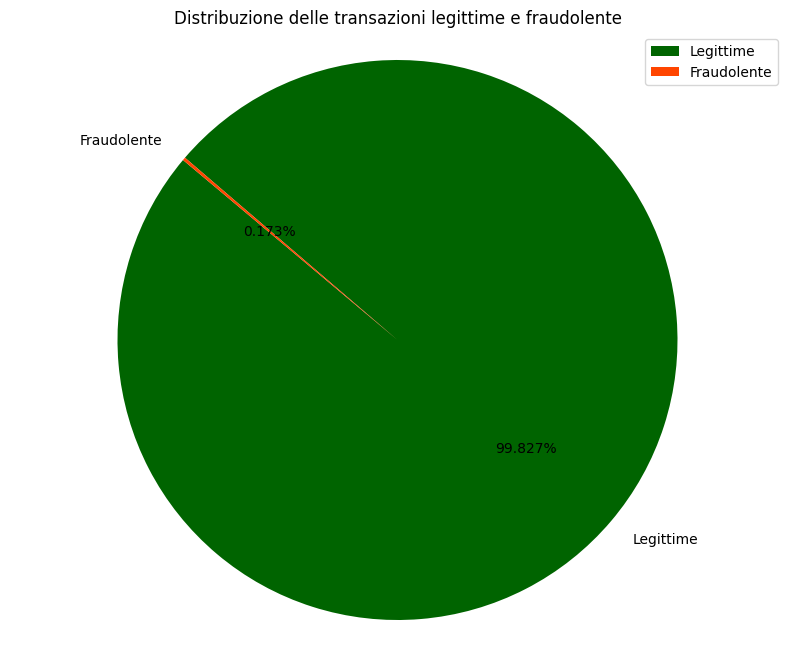

In [148]:
# Calcola il numero di transazioni normali e fraudolente
num_normal = df[df["Class"] == 0].shape[0]
num_fraud = df[df["Class"] == 1].shape[0]

# Etichette per le fette del grafico
labels = ['Legittime', 'Fraudolente']

# Dati da visualizzare nel grafico
sizes = [num_normal, num_fraud]

# Colori delle fette
colors = ['#006400', '#FF4500']

# Crea il grafico a torta con legenda e percentuali con tre cifre decimali
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.3f%%', startangle=140)
plt.title('Distribuzione delle transazioni legittime e fraudolente', loc='center')
plt.legend()
plt.axis('equal')  # Rende il grafico a torta circolare
plt.show()

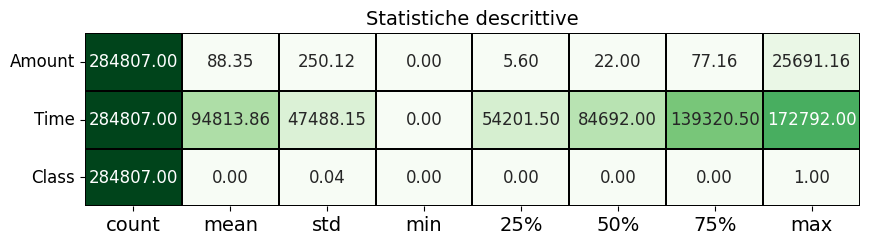

In [149]:
# Statistiche Descrittive del Dataset:
cols =df[["Amount","Time","Class"]]
cmap1 = 'Greens'
def desc_stats(dataframe):
    desc = dataframe.describe().T #restituisce le info del dataframe
    f,ax = plt.subplots(figsize=(10, desc.shape[0] * 0.75))

    #Creazione mappa per una diversa visualizzazione della descrizione DataFrame
    sns.heatmap(desc, annot = True, cmap = cmap1, fmt= '.2f', ax = ax, linecolor = 'black', linewidths = 1.3, cbar = False, annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,rotation = 0)
    plt.title("Statistiche descrittive", size = 14)
    plt.show()
desc_stats(cols)

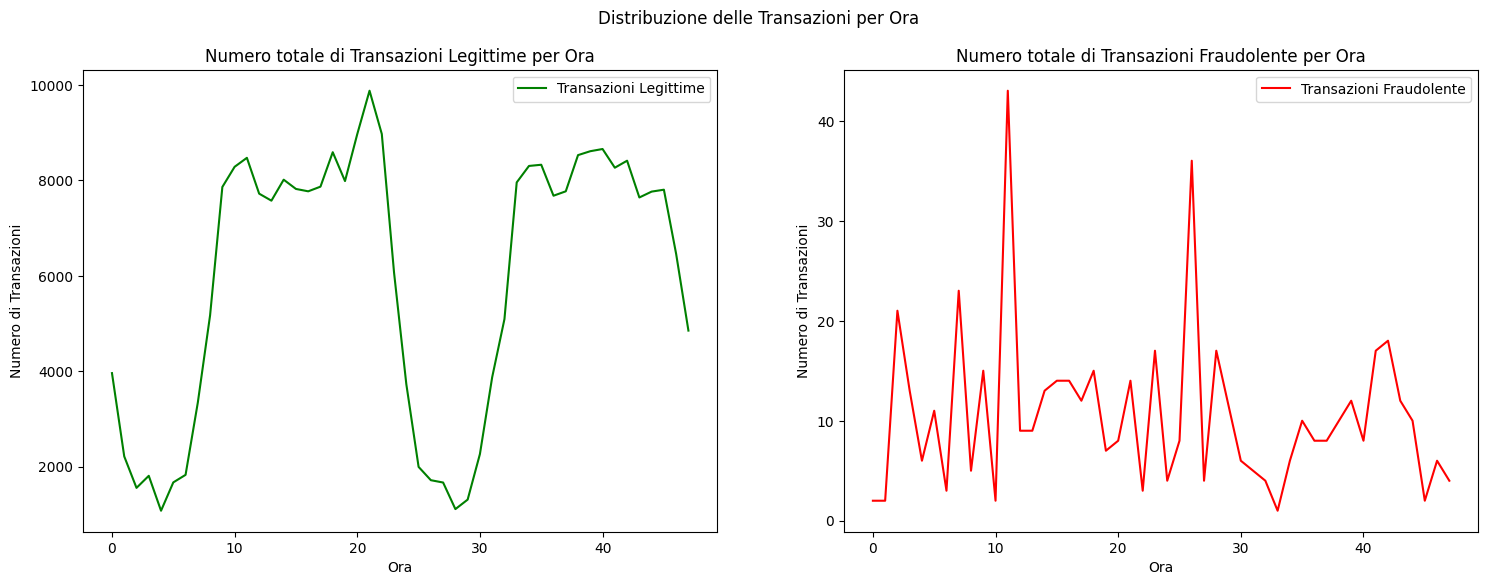

In [152]:
# Aggiunta del campo 'Hour' al DataFrame copiato
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Creazione di un nuovo DataFrame per l'analisi delle caratteristiche delle transazioni per ora
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count']).reset_index()
dfn = pd.DataFrame(tmp)
dfn.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions']

# Creazione dei grafici con legenda
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Creazione dei grafici
s = sns.lineplot(ax=ax1, x="Hour", y="Transactions", data=dfn.loc[dfn.Class == 0], color="green", label="Transazioni Legittime")
s = sns.lineplot(ax=ax2, x="Hour", y="Transactions", data=dfn.loc[dfn.Class == 1], color="red", label="Transazioni Fraudolente")

# Aggiunta delle legende ai grafici
ax1.legend()
ax2.legend()

# Impostazioni degli assi e dei titoli
ax1.set_xlabel("Ora")
ax1.set_ylabel("Numero di Transazioni")
ax1.set_title("Numero totale di Transazioni Legittime per Ora")
ax2.set_xlabel("Ora")
ax2.set_ylabel("Numero di Transazioni")
ax2.set_title("Numero totale di Transazioni Fraudolente per Ora")

# Titolo generale per entrambi i grafici
plt.suptitle("Distribuzione delle Transazioni per Ora")
plt.show()

In [151]:
#Restituisce le prime righe del nuovo dataframe utilizzato per la statistica
dfn.head()

,Hour,Class,Min,Max,Transactions
0,0.0,0,0.0,7712.43,3961
1,0.0,1,0.0,529.00,2
2,1.0,0,0.0,1769.69,2215
3,1.0,1,59.0,239.93,2
4,2.0,0,0.0,4002.88,1555
